In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.neural_network  import MLPClassifier
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data3.csv")
df;
X = df.drop(['Target','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [3]:
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)

In [4]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [5]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,60),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 60), max_iter=300)

In [6]:
y_pred = mlp_clf.predict(trainX)

print('Accuracy: {:.2f}'.format(accuracy_score(trainY, y_pred)*100))

Accuracy: 43.44


In [7]:
fig = plot_confusion_matrix(mlp_clf, trainX_scaled, trainY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for pv Dataset")
plt.show()

NameError: name 'trainX_scaled' is not defined

In [38]:
y_pred1 = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred1)*100))

Accuracy: 10.00


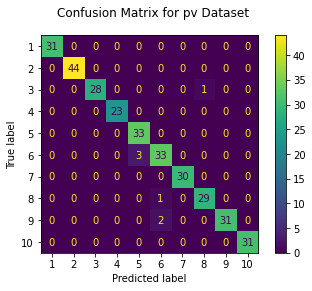

In [26]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for pv Dataset")
plt.show()

In [27]:
YR=np.concatenate((trainY,testY),axis=0)

In [28]:
YP = np.concatenate((y_pred,y_pred1), axis=0)

In [29]:
ac2=accuracy_score(YR,YP)*100
ac2

99.375

In [30]:
c2=confusion_matrix(YR,YP)
c2

array([[160,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 160,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 159,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3, 156,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0, 159,   0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 157,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 160]], dtype=int64)